# Identifying Outliers

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf

1- Converting prices to returns

In [3]:
# Download data
df = yf.download('AAPL', start='2013-01-01', end='2023-12-31', progress=False)

In [5]:
# Keep only the adjusted close price
df = df.loc[:, ['Adj Close']]
df.rename(columns={'Adj Close':'adj_close'}, inplace=True)

In [6]:
# Calcule simple retuns
df['simple_rtn'] = df.adj_close.pct_change()

In [7]:
# show data
df.head()

,adj_close,simple_rtn
Date,,
2013-01-02,16.769094,NaN
2013-01-03,16.557426,-0.012623
2013-01-04,16.096235,-0.027854
2013-01-07,16.001545,-0.005883
2013-01-08,16.044609,0.002691


2- Calculate the rolling mean and standard deviation

In [10]:
df_rolling = df[['simple_rtn']].rolling(window=21).agg(['mean', 'std'])
df_rolling.columns = df_rolling.columns.droplevel()

3- Join the rolling metrics to the original data

In [11]:
df_outliers = df.join(df_rolling)

4- Define a function for detecting outliers

In [12]:
def indentify_outliers(row, n_sigmas=3):
    """
        Funtions for identifying the outliers using the 3 sigma rule.
        The row must contain the following columns/indices: simple_rtn, mean, std.

        Parameters:
        -----------
            row: pd.series
                A row of a pd.DataFrame, over which the function can be applied
            n_sigmas: int
                The number of standard deviations above/below the mean - used for detecting outliers

        Returns:
        --------
            0/1: int
                An integer with 1 indicating an outliers and 0 otherwise 
    """

    x = row['simple_rtn']
    mu = row['mean']
    sigma = row['std']

    if(x > mu + 3 * sigma) | (x < mu - 3 * sigma):
        return 1
    else:
        return 0

4- Identify the outliers and extract their values for later use

In [20]:
df_outliers['outlier'] = df_outliers.apply(indentify_outliers, axis=1)
outliers = df_outliers.loc[df_outliers['outlier'] == 1, ['simple_rtn']]

5- Plot Results

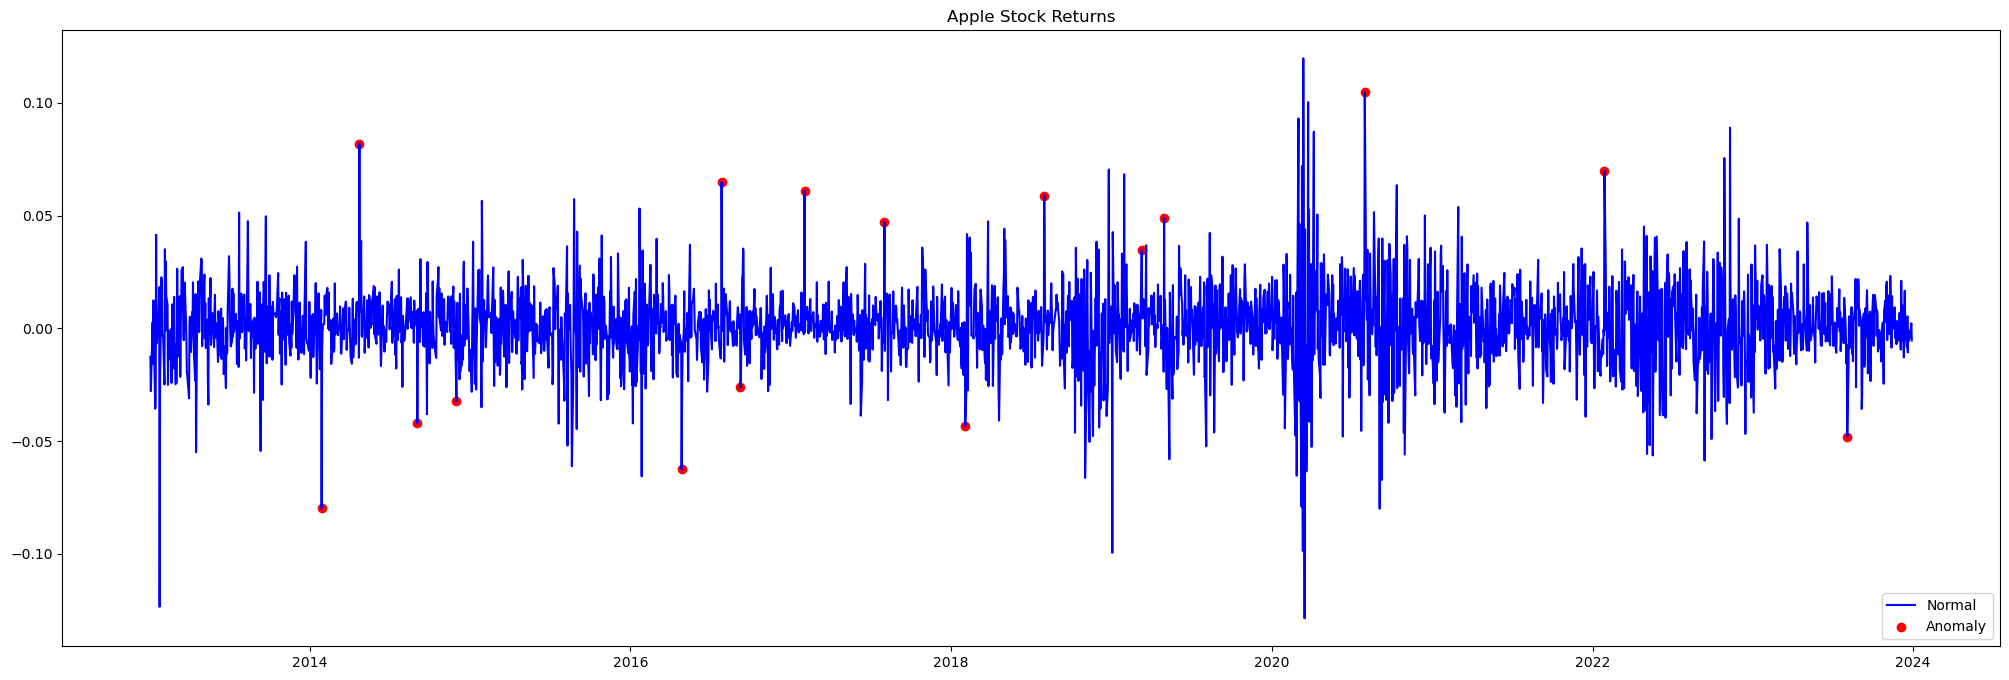

In [21]:
fig, ax = plt.subplots(figsize=(25,8))

ax.plot(df_outliers.index, df_outliers.simple_rtn, color='blue', label='Normal')
ax.scatter(outliers.index, outliers.simple_rtn, color='red', label='Anomaly')
ax.set_title('Apple Stock Returns')
ax.legend(loc='lower right')

# plt.tight_layout()
plt.show()